In [6]:
!pip install autots

     |████████████████████████████████| 460 kB 10.0 MB/s 


In [8]:
from google.colab import files
up = files.upload()

Saving DOGE-USD.csv to DOGE-USD.csv


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

data = pd.read_csv("DOGE-USD.csv")
print(data.head())

         Date      Open      High       Low     Close  Adj Close       Volume
0  2021-04-24  0.249544  0.289390  0.229891  0.270212   0.270212  11057578568
1  2021-04-25  0.269789  0.288771  0.226301  0.251111   0.251111   6849914675
2  2021-04-26  0.251240  0.280452  0.248026  0.270674   0.270674   5118886527
3  2021-04-27  0.271427  0.279629  0.264928  0.272188   0.272188   3590611310
4  2021-04-28  0.272273  0.344662  0.256231  0.323682   0.323682  14464343767


In [10]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,0.228449,0.241219,0.215505,0.228204,0.228204,2.948016e+09
std,0.094468,0.107908,0.081481,0.094781,0.094781,5.049084e+09
min,0.111607,0.114213,0.109555,0.111608,0.111608,2.352770e+08
25%,0.153544,0.160330,0.146996,0.152315,0.152315,9.126182e+08
50%,0.209406,0.224150,0.202090,0.209136,0.209136,1.475249e+09
75%,0.268296,0.282345,0.254668,0.267838,0.267838,2.579983e+09
max,0.687801,0.737567,0.608168,0.684777,0.684777,4.613806e+10


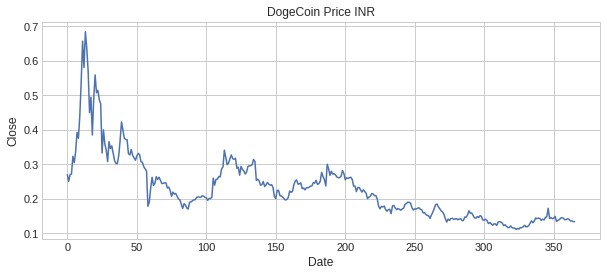

In [12]:
plt.figure(figsize=(10, 4))
plt.title("DogeCoin Price INR")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

In [13]:
from autots import AutoTS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)

prediction = model.predict()
forecast = prediction.forecast
print("DogeCoin Price Prediction")
print(forecast)

Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
6/6 [==============================] - 6s 6ms/step - loss: 0.4721
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 0.4464
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 0.4249
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 0.4008
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3744
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3405
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3009
Epoch 8/50
6/6 [==============================] - 0s 5ms/step - loss: 0.2860
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 0.2621
Epoch 10/50
6/6 [==============================] - 0s 5ms/step - loss: 0.2543
Epoch 11/50
6/6 [==============================] - 0s 6ms/step - loss: 0.2546
Epoch 12/50
6/6 [==============================] - 0s 7ms/step - loss: 0.2442
Epoch

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 41 with model LastValueNaive in generation 0 of 10
Model Number: 42 with model AverageValueNaive in generation 0 of 10
Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 46: ETS
Model Number: 47 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 50: VAR
Model Number: 51 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 51: VECM
Model Number: 52 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52: WindowRegression
Model Number: 53 with model DatepartRegression in generation 0 of 10
Model Number: 54 with model MultivariateRegression in generation 0 of 10
Model

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 100 with model GLS in generation 0 of 10
Model Number: 101 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10, 1), got (10,).') in model 101: UnobservedComponents
Model Number: 102 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 102: GluonTS
Model Number: 103 with model SeasonalNaive in generation 0 of 10
Model Number: 104 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 104: UnobservedComponents
Model Number: 105 with model NVAR in generation 0 of 10
Model Number: 106 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 106: FBProphet
Model Number: 107 with 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 127 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 127: VAR
Model Number: 128 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 128: GluonTS
Model Number: 129 with model MultivariateMotif in generation 0 of 10
Model Number: 130 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 130: Theta
Model Number: 131 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 131: VAR
Model Number: 132 with model NVAR in generation 0 of 10
Model Number: 133 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 133: Theta
Model Number: 134 with model DatepartRegression in generation 0 of 

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Model Number: 167 with model MultivariateRegression in generation 1 of 10
Model Number: 168 with model MultivariateRegression in generation 1 of 10
Model Number: 169 with model MultivariateRegression in generation 1 of 10
Model Number: 170 with model MultivariateMotif in generation 1 of 10
Model Number: 171 with model MultivariateMotif in generation 1 of 10
Model Number: 172 with model MultivariateMotif in generation 1 of 10
Model Number: 173 with model MultivariateMotif in generation 1 of 10
Model Number: 174 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 174: UnobservedComponents
Model Number: 175 with model UnobservedComponents in generation 1 of 10
Model Number: 176 with model UnobservedComponents in generation 1 of 10
Model Number: 177 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 195 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 196 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 197 with model FBProphet in generation 1 of 10
Model Number: 198 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 198: GLM
Model Number: 199 with model GLM in generation 1 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 199: GLM
Model Number: 200 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 200: GLM
Model Number: 201 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in mo

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

Model Number: 236 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 236: MultivariateRegression
Model Number: 237 with model MultivariateRegression in generation 2 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

Model Number: 238 with model MultivariateRegression in generation 2 of 10
Model Number: 239 with model SectionalMotif in generation 2 of 10
Model Number: 240 with model SectionalMotif in generation 2 of 10
Model Number: 241 with model SectionalMotif in generation 2 of 10
Model Number: 242 with model SectionalMotif in generation 2 of 10
Model Number: 243 with model LastValueNaive in generation 2 of 10
Model Number: 244 with model LastValueNaive in generation 2 of 10
Model Number: 245 with model LastValueNaive in generation 2 of 10
Model Number: 246 with model GLS in generation 2 of 10
Model Number: 247 with model GLS in generation 2 of 10
Model Number: 248 with model GLS in generation 2 of 10
Model Number: 249 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 250 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 251 wit

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 271 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 272 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 273 with model FBProphet in generation 2 of 10
Model Number: 274 with model GLM in generation 2 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 274: GLM
Model Number: 275 with model GLM in generation 2 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 275: GLM
Model Number: 276 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 276: GLM
Model Number: 277 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 277: GLM
Model Number: 278 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-pa

Model Number: 304 with model MultivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 304: MultivariateRegression
Model Number: 305 with model MultivariateRegression in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

Model Number: 306 with model SeasonalNaive in generation 3 of 10
Model Number: 307 with model SeasonalNaive in generation 3 of 10
Model Number: 308 with model SeasonalNaive in generation 3 of 10
Model Number: 309 with model SeasonalNaive in generation 3 of 10
Model Number: 310 with model MultivariateMotif in generation 3 of 10
Model Number: 311 with model MultivariateMotif in generation 3 of 10
Model Number: 312 with model MultivariateMotif in generation 3 of 10
Model Number: 313 with model MultivariateMotif in generation 3 of 10
Model Number: 314 with model SectionalMotif in generation 3 of 10
Model Number: 315 with model SectionalMotif in generation 3 of 10
Model Number: 316 with model SectionalMotif in generation 3 of 10
Model Number: 317 with model SectionalMotif in generation 3 of 10
Model Number: 318 with model NVAR in generation 3 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 318: NVAR
Model Number: 319 with model NVAR in generation 3 of 10

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 345 with model DatepartRegression in generation 3 of 10
Model Number: 346 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 346: DatepartRegression
Model Number: 347 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 348 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 349 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 350 with model FBProphet in generation 3 of 10
Model Number: 351 with model GLM in generation 3 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 351: GLM
Model Number: 352 with model GLM in generation 3 of 10
Model Number: 353 with model GLM in generation 3 of 10
Model Number: 354 with model GLM in generation 3 of 10
Model Number: 355 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 355: GluonTS
Model Number: 356 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 356: GluonTS
Model Number: 357 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 357: GluonTS
Model Number: 358 wi

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 380 with model MultivariateRegression in generation 4 of 10
Template Eval Error: LightGBMError('[tweedie]: sum of labels is zero') in model 380: MultivariateRegression
Model Number: 381 with model MultivariateRegression in generation 4 of 10
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 381: MultivariateRegression
Model Number: 382 with model MultivariateRegression in generation 4 of 10
Model Number: 383 with model SeasonalNaive in generation 4 of 10
Model Number: 384 with model SeasonalNaive in generation 4 of 10
Model Number: 385 with model SeasonalNaive in generation 4 of 10
Model Number: 386 with model SeasonalNaive in generation 4 of 10
Model Number: 387 with model MultivariateMotif in generation 4 of 10
Model Number: 388 with model MultivariateMotif in generation 4 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 388: Multivariate

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 429 with model FBProphet in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 429: FBProphet
Model Number: 430 with model FBProphet in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 430: FBProphet
Model Number: 431 with model FBProphet in generation 4 of 10
Model Number: 432 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 432: GluonTS
Model Number: 433 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 433: GluonTS
Model Number: 434 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 434: Gluon

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 499 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 499: DatepartRegression
Model Number: 500 with model GLM in generation 5 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 500: GLM
Model Number: 501 with model GLM in generation 5 of 10
Model Number: 502 with model GLM in generation 5 of 10
Model Number: 503 with model FBProphet in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 504 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 505 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 506 with model FBProphet in generation 5 of 10
Model Number: 507 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 507: GluonTS
Model Number: 508 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 508: GluonTS
Model Number: 509 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 509: GluonTS
Model Number: 510 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 510: GluonTS
Model Number: 511 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 511: VAR
Model Num

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.585e-01, tolerance: 1.900e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


New Generation: 6 of 10
Model Number: 527 with model UnivariateMotif in generation 6 of 10
Model Number: 528 with model UnivariateMotif in generation 6 of 10
Model Number: 529 with model UnivariateMotif in generation 6 of 10
Model Number: 530 with model UnivariateMotif in generation 6 of 10
Model Number: 531 with model MultivariateMotif in generation 6 of 10
Model Number: 532 with model MultivariateMotif in generation 6 of 10
Model Number: 533 with model MultivariateMotif in generation 6 of 10
Model Number: 534 with model MultivariateMotif in generation 6 of 10
Model Number: 535 with model MultivariateRegression in generation 6 of 10
Model Number: 536 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 536: MultivariateRegression
Model Number: 537 with model MultivariateRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Model Number: 538 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 538: MultivariateRegression


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 539 with model WindowRegression in generation 6 of 10
Model Number: 540 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 540: WindowRegression
Model Number: 541 with model WindowRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: U

Model Number: 542 with model LastValueNaive in generation 6 of 10
Model Number: 543 with model LastValueNaive in generation 6 of 10
Model Number: 544 with model LastValueNaive in generation 6 of 10
Model Number: 545 with model SeasonalNaive in generation 6 of 10
Model Number: 546 with model SeasonalNaive in generation 6 of 10
Model Number: 547 with model SeasonalNaive in generation 6 of 10
Model Number: 548 with model SeasonalNaive in generation 6 of 10
Model Number: 549 with model NVAR in generation 6 of 10
Model Number: 550 with model NVAR in generation 6 of 10
Model Number: 551 with model NVAR in generation 6 of 10
Model Number: 552 with model NVAR in generation 6 of 10
Model Number: 553 with model SectionalMotif in generation 6 of 10
Model Number: 554 with model SectionalMotif in generation 6 of 10
Model Number: 555 with model SectionalMotif in generation 6 of 10
Model Number: 556 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=100) out of boun

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 580 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 581 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 582 with model FBProphet in generation 6 of 10
Model Number: 583 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 583: GluonTS
Model Number: 584 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 584: GluonTS
Model Number: 585 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 585: GluonTS
Model Number: 586 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 586: GluonTS
Model Number: 587 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 587: VAR
Model Num

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

Model Number: 610 with model MultivariateRegression in generation 7 of 10
Model Number: 611 with model MultivariateRegression in generation 7 of 10
Model Number: 612 with model MultivariateRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

Model Number: 613 with model LastValueNaive in generation 7 of 10
Model Number: 614 with model LastValueNaive in generation 7 of 10
Model Number: 615 with model LastValueNaive in generation 7 of 10
Model Number: 616 with model WindowRegression in generation 7 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Model Number: 617 with model WindowRegression in generation 7 of 10
[LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear]Model Number: 618 with model WindowRegression in generation 7 of 10
Epoch 1/100
4/4 [==============================] - 2s 102ms/step - loss: 0.1468 - val_loss: 0.1577
Epoch 2/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0571 - val_loss: 0.1109
Epoch 3/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0475 - val_loss: 0.0738
Epoch 4/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0408 - val_loss: 0.0738
Epoch 5/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0387 - val_loss: 0.0717
Epoch 6/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0344 - val_loss: 0.0473
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0301 - val_loss: 0.0650
Epoch 8/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0284 - val_loss: 0.0424
Epoch 9/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0270 - val_loss: 0.0475
Epoch 10/100
4/4 [=========

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 647 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 648 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 649 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 650 with model DatepartRegression in generation 7 of 10
Model Number: 651 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 651: DatepartRegression
Model Number: 652 with model DatepartRegression in generation 7 of 10
Model Number: 653 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 654 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 655 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 656 with model FBProphet in generation 7 of 10
Model Number: 657 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 657: GluonTS
Model Number: 658 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 658: GluonTS
Model Number: 659 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 659: GluonTS
Model Number: 660 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 660: GluonTS
Model Number: 661 with model VAR in generation 7 of 10
Template Eval Error: IndexError('tuple index out of range') in model 661: VAR
Model Number: 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Model Number: 683 with model MultivariateMotif in generation 8 of 10
Model Number: 684 with model UnivariateMotif in generation 8 of 10
Model Number: 685 with model UnivariateMotif in generation 8 of 10
Model Number: 686 with model UnivariateMotif in generation 8 of 10
Model Number: 687 with model UnivariateMotif in generation 8 of 10
Model Number: 688 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

Model Number: 689 with model MultivariateRegression in generation 8 of 10
Model Number: 690 with model MultivariateRegression in generation 8 of 10
Model Number: 691 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

Model Number: 692 with model AverageValueNaive in generation 8 of 10
Model Number: 693 with model AverageValueNaive in generation 8 of 10
Model Number: 694 with model AverageValueNaive in generation 8 of 10
Model Number: 695 with model LastValueNaive in generation 8 of 10
Model Number: 696 with model LastValueNaive in generation 8 of 10
Model Number: 697 with model SeasonalNaive in generation 8 of 10
Model Number: 698 with model SeasonalNaive in generation 8 of 10
Model Number: 699 with model SeasonalNaive in generation 8 of 10
Model Number: 700 with model SeasonalNaive in generation 8 of 10
Model Number: 701 with model UnobservedComponents in generation 8 of 10
Model Number: 702 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 702: UnobservedComponents
Model Number: 703 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError('Provided exogenous values 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: TypeError('in user code:\n\n    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1021, in train_function  *\n        return step_function(self, iterator)\n    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1010, in step_function  **\n        outputs = model.distribute_strategy.run(run_step, args=(data,))\n    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1000, in run_step  **\n        outputs = model.train_step(data)\n    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 859, in train_step\n        y_pred = self(x, training=True)\n    File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler\n        raise e.with_traceback(filtered_tb) from None\n\n    TypeError: Exception encountered when calling layer "residual_wrapper" (type ResidualWrapper).\n    \n    in user code:\n    \n        File "/usr/local/lib/

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 730 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 731 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 732 with model FBProphet in generation 8 of 10
Model Number: 733 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 733: GluonTS
Model Number: 734 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 734: GluonTS
Model Number: 735 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 735: GluonTS
Model Number: 736 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 736: GluonTS
Model Number: 737 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 737: VAR
Model Num

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 799 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 800 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 801 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 802 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 803 with model DatepartRegression in generation 9 of 10
Model Number: 804 with model DatepartRegression in generation 9 of 10
Model Number: 805 with model DatepartRegression in generation 9 of 10
Model Number: 806 with model FBProphet in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 807 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 808 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 809 with model FBProphet in generation 9 of 10
Model Number: 810 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 810: GluonTS
Model Number: 811 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 811: GluonTS
Model Number: 812 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 812: GluonTS
Model Number: 813 with model GluonTS in generation 9 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 813: GluonTS
Model Number: 814 with model VAR in generation 9 of 10
Template Eval Error: IndexError('tuple index out of range') in model 814: VAR
Model Number: 

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 845 with model FBProphet in generation 10 of 10
Model Number: 846 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 846: WindowRegression
Model Number: 847 with model WindowRegression in generation 10 of 10
Model Number: 848 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 848: WindowRegression
Model Number: 849 with model MultivariateRegression in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

Model Number: 850 with model MultivariateRegression in generation 10 of 10
Model Number: 851 with model MultivariateRegression in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

Model Number: 852 with model MultivariateRegression in generation 10 of 10
Model Number: 853 with model UnivariateMotif in generation 10 of 10
Model Number: 854 with model UnivariateMotif in generation 10 of 10
Model Number: 855 with model UnivariateMotif in generation 10 of 10
Model Number: 856 with model UnivariateMotif in generation 10 of 10
Model Number: 857 with model AverageValueNaive in generation 10 of 10
Model Number: 858 with model AverageValueNaive in generation 10 of 10
Model Number: 859 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10, 1), got (10,).') in model 859: UnobservedComponents
Model Number: 860 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 860: UnobservedComponents
Model Number: 861 with model UnobservedComponents in generation 10 of 10
Model Num

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 880 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 881 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 882 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 883 with model Ensemble in generation 11 of 0
Model Number: 884 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Epoch 1/100
4/4 [==============================] - 2s 92ms/step - loss: 0.1468 - val_loss: 0.1577
Epoch 2/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0571 - val_loss: 0.1109
Epoch 3/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0475 - val_loss: 0.0738
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0408 - val_loss: 0.0738
Epoch 5/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0387 - val_loss: 0.0717
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0344 - val_loss: 0.0473
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0301 - val_loss: 0.0650
Epoch 8/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0284 - val_loss: 0.0424
Epoch 9/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0270 - val_loss: 0.0475
Epoch 10/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0253 - val_loss: 0.0398
Epoch 11/100
4/4 [=

Model Number: 885 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

Model Number: 886 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

Model Number: 887 with model Ensemble in generation 11 of 0
Model Number: 888 with model Ensemble in generation 11 of 0


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Epoch 1/100
4/4 [==============================] - 2s 89ms/step - loss: 0.1468 - val_loss: 0.1577
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0571 - val_loss: 0.1109
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0475 - val_loss: 0.0738
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0408 - val_loss: 0.0738
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0387 - val_loss: 0.0717
Epoch 6/100
4/4 [==============================] - 0s 31ms/step - loss: 0.0344 - val_loss: 0.0473
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0301 - val_loss: 0.0650
Epoch 8/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0284 - val_loss: 0.0424
Epoch 9/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0270 - val_loss: 0.0475
Epoch 10/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0253 - val_loss: 0.0398
Epoch 11/100
4/4 [=

Model Number: 889 with model Ensemble in generation 11 of 0
Model Number: 890 with model Ensemble in generation 11 of 0
Validation Round: 1
Model Number: 1 of 134 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Epoch 1/100
4/4 [==============================] - 2s 90ms/step - loss: 0.1607 - val_loss: 0.1252
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0574 - val_loss: 0.0689
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0496 - val_loss: 0.0716
Epoch 4/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0419 - val_loss: 0.0528
Epoch 5/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0382 - val_loss: 0.0505
Epoch 6/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0335 - val_loss: 0.0496
Epoch 7/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0294 - val_loss: 0.0598
Epoch 8/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0290 - val_loss: 0.0411
Epoch 9/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0279 - val_loss: 0.0301
Epoch 10/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0277 - val_loss: 0.0448
Epoch 11/100
4/4 [=

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Epoch 1/100
4/4 [==============================] - 3s 91ms/step - loss: 0.1607 - val_loss: 0.1252
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0574 - val_loss: 0.0689
Epoch 3/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0496 - val_loss: 0.0716
Epoch 4/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0419 - val_loss: 0.0528
Epoch 5/100
4/4 [==============================] - 0s 28ms/step - loss: 0.0382 - val_loss: 0.0505
Epoch 6/100
4/4 [==============================] - 0s 28ms/step - loss: 0.0335 - val_loss: 0.0496
Epoch 7/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0294 - val_loss: 0.0598
Epoch 8/100
4/4 [==============================] - 0s 30ms/step - loss: 0.0290 - val_loss: 0.0411
Epoch 9/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0279 - val_loss: 0.0301
Epoch 10/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0277 - val_loss: 0.0448
Epoch 11/100
4/4 [=

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10 - FBProphet with avg smape 3.57: 
Model Number: 11 of 134 with model WindowRegression for Validation 1
Epoch 1/100
4/4 [==============================] - 2s 85ms/step - loss: 0.1607 - val_loss: 0.1252
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0574 - val_loss: 0.0689
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0496 - val_loss: 0.0716
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0419 - val_loss: 0.0528
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0382 - val_loss: 0.0505
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0335 - val_loss: 0.0496
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0294 - val_loss: 0.0598
Epoch 8/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0290 - val_loss: 0.0411
Epoch 9/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0279 - val_loss: 0.0301
Epoch 10/100

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

14 - Ensemble with avg smape 3.55: 
Model Number: 15 of 134 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

15 - MultivariateRegression with avg smape 5.26: 
Model Number: 16 of 134 with model UnivariateMotif for Validation 1
16 - UnivariateMotif with avg smape 3.57: 
Model Number: 17 of 134 with model UnivariateMotif for Validation 1
17 - UnivariateMotif with avg smape 4.07: 
Model Number: 18 of 134 with model AverageValueNaive for Validation 1
18 - AverageValueNaive with avg smape 6.96: 
Model Number: 19 of 134 with model NVAR for Validation 1
19 - NVAR with avg smape 5.88: 
Model Number: 20 of 134 with model MultivariateMotif for Validation 1
20 - MultivariateMotif with avg smape 4.95: 
Model Number: 21 of 134 with model NVAR for Validation 1
21 - NVAR with avg smape 4.39: 
Model Number: 22 of 134 with model WindowRegression for Validation 1
22 - WindowRegression with avg smape 6.58: 
Model Number: 23 of 134 with model AverageValueNaive for Validation 1
23 - AverageValueNaive with avg smape 6.24: 
Model Number: 24 of 134 with model NVAR for Validation 1
24 - NVAR with avg smape 10.38: 
Mo

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

34 - Ensemble with avg smape 3.77: 
Model Number: 35 of 134 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

35 - MultivariateRegression with avg smape 5.62: 
Model Number: 36 of 134 with model MultivariateRegression for Validation 1
36 - MultivariateRegression with avg smape 8.03: 
Model Number: 37 of 134 with model MultivariateRegression for Validation 1
37 - MultivariateRegression with avg smape 6.31: 
Model Number: 38 of 134 with model UnivariateMotif for Validation 1
38 - UnivariateMotif with avg smape 3.83: 
Model Number: 39 of 134 with model SeasonalNaive for Validation 1
39 - SeasonalNaive with avg smape 4.04: 
Model Number: 40 of 134 with model MultivariateMotif for Validation 1
40 - MultivariateMotif with avg smape 14.97: 
Model Number: 41 of 134 with model UnobservedComponents for Validation 1
41 - UnobservedComponents with avg smape 4.16: 
Model Number: 42 of 134 with model SeasonalNaive for Validation 1
42 - SeasonalNaive with avg smape 5.56: 
Model Number: 43 of 134 with model MultivariateMotif for Validation 1
43 - MultivariateMotif with avg smape 4.77: 
Model Number: 44 of 134

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

65 - MultivariateRegression with avg smape 8.24: 
Model Number: 66 of 134 with model SeasonalNaive for Validation 1
66 - SeasonalNaive with avg smape 6.18: 
Model Number: 67 of 134 with model AverageValueNaive for Validation 1
67 - AverageValueNaive with avg smape 5.42: 
Model Number: 68 of 134 with model MultivariateRegression for Validation 1
68 - MultivariateRegression with avg smape 5.37: 
Model Number: 69 of 134 with model SectionalMotif for Validation 1
69 - SectionalMotif with avg smape 5.66: 
Model Number: 70 of 134 with model WindowRegression for Validation 1
70 - WindowRegression with avg smape 6.49: 
Model Number: 71 of 134 with model WindowRegression for Validation 1
71 - WindowRegression with avg smape 8.7: 
Model Number: 72 of 134 with model LastValueNaive for Validation 1
72 - LastValueNaive with avg smape 3.67: 
Model Number: 73 of 134 with model MultivariateMotif for Validation 1
73 - MultivariateMotif with avg smape 8.46: 
Model Number: 74 of 134 with model LastValueN

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]85 - WindowRegression with avg smape 4.3: 
Model Number: 86 of 134 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

86 - MultivariateRegression with avg smape 4.73: 
Model Number: 87 of 134 with model LastValueNaive for Validation 1
87 - LastValueNaive with avg smape 5.43: 
Model Number: 88 of 134 with model ZeroesNaive for Validation 1
88 - ZeroesNaive with avg smape 5.53: 
Model Number: 89 of 134 with model GLM for Validation 1
89 - GLM with avg smape 4.81: 
Model Number: 90 of 134 with model GLM for Validation 1
90 - GLM with avg smape 4.79: 
Model Number: 91 of 134 with model SectionalMotif for Validation 1
91 - SectionalMotif with avg smape 4.02: 
Model Number: 92 of 134 with model GLM for Validation 1


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


92 - GLM with avg smape 5.03: 
Model Number: 93 of 134 with model SectionalMotif for Validation 1
93 - SectionalMotif with avg smape 10.9: 
Model Number: 94 of 134 with model ZeroesNaive for Validation 1
94 - ZeroesNaive with avg smape 4.84: 
Model Number: 95 of 134 with model ZeroesNaive for Validation 1
95 - ZeroesNaive with avg smape 4.84: 
Model Number: 96 of 134 with model ZeroesNaive for Validation 1
96 - ZeroesNaive with avg smape 4.84: 
Model Number: 97 of 134 with model UnobservedComponents for Validation 1
97 - UnobservedComponents with avg smape 6.67: 
Model Number: 98 of 134 with model GLS for Validation 1
98 - GLS with avg smape 3.74: 
Model Number: 99 of 134 with model GLS for Validation 1
99 - GLS with avg smape 3.74: 
Model Number: 100 of 134 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
100 - ETS with avg smape 5.34: 
Model Number: 101 of 134 with model GLS for Validation 1
101 - GLS with avg smape 3

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


120 - DatepartRegression with avg smape 5.38: 
Model Number: 121 of 134 with model FBProphet for Validation 1
121 - FBProphet with avg smape 12.89: 
Model Number: 122 of 134 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


122 - DatepartRegression with avg smape 3.71: 
Model Number: 123 of 134 with model DatepartRegression for Validation 1
123 - DatepartRegression with avg smape 13.91: 
Model Number: 124 of 134 with model GLM for Validation 1
124 - GLM with avg smape 5.43: 
Model Number: 125 of 134 with model GLM for Validation 1
125 - GLM with avg smape 4.06: 
Model Number: 126 of 134 with model DatepartRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


126 - DatepartRegression with avg smape 5.61: 
Model Number: 127 of 134 with model FBProphet for Validation 1
127 - FBProphet with avg smape 6.89: 
Model Number: 128 of 134 with model DatepartRegression for Validation 1
128 - DatepartRegression with avg smape 6.26: 
Model Number: 129 of 134 with model DatepartRegression for Validation 1
129 - DatepartRegression with avg smape 4.1: 
Model Number: 130 of 134 with model DatepartRegression for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


130 - DatepartRegression with avg smape 3.9: 
Model Number: 131 of 134 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


131 - FBProphet with avg smape 22.26: 
Model Number: 132 of 134 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


132 - FBProphet with avg smape 22.41: 
Model Number: 133 of 134 with model FBProphet for Validation 1
133 - FBProphet with avg smape 5.01: 
Model Number: 134 of 134 with model DatepartRegression for Validation 1
134 - DatepartRegression with avg smape 5.43: 
Validation Round: 2
Model Number: 1 of 134 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Epoch 1/100
4/4 [==============================] - 2s 84ms/step - loss: 0.1872 - val_loss: 0.0615
Epoch 2/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0642 - val_loss: 0.0420
Epoch 3/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0527 - val_loss: 0.0411
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0483 - val_loss: 0.0462
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0439 - val_loss: 0.0419
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0369 - val_loss: 0.0389
Epoch 7/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0312 - val_loss: 0.0321
Epoch 8/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0323 - val_loss: 0.0309
Epoch 9/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0277 - val_loss: 0.0410
Epoch 10/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0335 - val_loss: 0.0330
Epoch 11/100
4/4 [=

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Epoch 1/100
4/4 [==============================] - 2s 96ms/step - loss: 0.1872 - val_loss: 0.0615
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0642 - val_loss: 0.0420
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0527 - val_loss: 0.0411
Epoch 4/100
4/4 [==============================] - 0s 30ms/step - loss: 0.0483 - val_loss: 0.0462
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0439 - val_loss: 0.0419
Epoch 6/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0369 - val_loss: 0.0389
Epoch 7/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0312 - val_loss: 0.0321
Epoch 8/100
4/4 [==============================] - 0s 28ms/step - loss: 0.0323 - val_loss: 0.0309
Epoch 9/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0277 - val_loss: 0.0410
Epoch 10/100
4/4 [==============================] - 0s 27ms/step - loss: 0.0335 - val_loss: 0.0330
Epoch 11/100
4/4 [=

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10 - FBProphet with avg smape 12.36: 
Model Number: 11 of 134 with model WindowRegression for Validation 2
Epoch 1/100
4/4 [==============================] - 2s 92ms/step - loss: 0.1872 - val_loss: 0.0615
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0642 - val_loss: 0.0420
Epoch 3/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0527 - val_loss: 0.0411
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0483 - val_loss: 0.0462
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0439 - val_loss: 0.0419
Epoch 6/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0369 - val_loss: 0.0389
Epoch 7/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0312 - val_loss: 0.0321
Epoch 8/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0323 - val_loss: 0.0309
Epoch 9/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0277 - val_loss: 0.0410
Epoch 10/10

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

14 - Ensemble with avg smape 13.12: 
Model Number: 15 of 134 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

15 - MultivariateRegression with avg smape 14.37: 
Model Number: 16 of 134 with model UnivariateMotif for Validation 2
16 - UnivariateMotif with avg smape 17.31: 
Model Number: 17 of 134 with model UnivariateMotif for Validation 2
17 - UnivariateMotif with avg smape 18.68: 
Model Number: 18 of 134 with model AverageValueNaive for Validation 2
18 - AverageValueNaive with avg smape 17.36: 
Model Number: 19 of 134 with model NVAR for Validation 2
19 - NVAR with avg smape 16.14: 
Model Number: 20 of 134 with model MultivariateMotif for Validation 2
20 - MultivariateMotif with avg smape 15.88: 
Model Number: 21 of 134 with model NVAR for Validation 2
21 - NVAR with avg smape 14.42: 
Model Number: 22 of 134 with model WindowRegression for Validation 2
22 - WindowRegression with avg smape 16.9: 
Model Number: 23 of 134 with model AverageValueNaive for Validation 2
23 - AverageValueNaive with avg smape 16.16: 
Model Number: 24 of 134 with model NVAR for Validation 2
24 - NVAR with avg smape 22

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

34 - Ensemble with avg smape 13.75: 
Model Number: 35 of 134 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

35 - MultivariateRegression with avg smape 10.44: 
Model Number: 36 of 134 with model MultivariateRegression for Validation 2
36 - MultivariateRegression with avg smape 16.31: 
Model Number: 37 of 134 with model MultivariateRegression for Validation 2
37 - MultivariateRegression with avg smape 16.46: 
Model Number: 38 of 134 with model UnivariateMotif for Validation 2
38 - UnivariateMotif with avg smape 17.92: 
Model Number: 39 of 134 with model SeasonalNaive for Validation 2
39 - SeasonalNaive with avg smape 11.13: 
Model Number: 40 of 134 with model MultivariateMotif for Validation 2
40 - MultivariateMotif with avg smape 15.74: 
Model Number: 41 of 134 with model UnobservedComponents for Validation 2
41 - UnobservedComponents with avg smape 12.57: 
Model Number: 42 of 134 with model SeasonalNaive for Validation 2
42 - SeasonalNaive with avg smape 19.2: 
Model Number: 43 of 134 with model MultivariateMotif for Validation 2
43 - MultivariateMotif with avg smape 5.73: 
Model Number: 44 

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/l

65 - MultivariateRegression with avg smape 14.83: 
Model Number: 66 of 134 with model SeasonalNaive for Validation 2
66 - SeasonalNaive with avg smape 17.32: 
Model Number: 67 of 134 with model AverageValueNaive for Validation 2
67 - AverageValueNaive with avg smape 16.07: 
Model Number: 68 of 134 with model MultivariateRegression for Validation 2
68 - MultivariateRegression with avg smape 18.12: 
Model Number: 69 of 134 with model SectionalMotif for Validation 2
69 - SectionalMotif with avg smape 16.74: 
Model Number: 70 of 134 with model WindowRegression for Validation 2
70 - WindowRegression with avg smape 10.08: 
Model Number: 71 of 134 with model WindowRegression for Validation 2
71 - WindowRegression with avg smape 3.65: 
Model Number: 72 of 134 with model LastValueNaive for Validation 2
72 - LastValueNaive with avg smape 17.12: 
Model Number: 73 of 134 with model MultivariateMotif for Validation 2
73 - MultivariateMotif with avg smape 15.75: 
Model Number: 74 of 134 with model L

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear]85 - WindowRegression with avg smape 13.79: 
Model Number: 86 of 134 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


86 - MultivariateRegression with avg smape 15.32: 
Model Number: 87 of 134 with model LastValueNaive for Validation 2
87 - LastValueNaive with avg smape 8.3: 
Model Number: 88 of 134 with model ZeroesNaive for Validation 2
88 - ZeroesNaive with avg smape 14.27: 
Model Number: 89 of 134 with model GLM for Validation 2
89 - GLM with avg smape 2.36: 
Model Number: 90 of 134 with model GLM for Validation 2
90 - GLM with avg smape 2.35: 
Model Number: 91 of 134 with model SectionalMotif for Validation 2
91 - SectionalMotif with avg smape 10.73: 
Model Number: 92 of 134 with model GLM for Validation 2


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


92 - GLM with avg smape 2.5: 
Model Number: 93 of 134 with model SectionalMotif for Validation 2
93 - SectionalMotif with avg smape 6.5: 
Model Number: 94 of 134 with model ZeroesNaive for Validation 2
94 - ZeroesNaive with avg smape 13.33: 
Model Number: 95 of 134 with model ZeroesNaive for Validation 2
95 - ZeroesNaive with avg smape 13.33: 
Model Number: 96 of 134 with model ZeroesNaive for Validation 2
96 - ZeroesNaive with avg smape 13.33: 
Model Number: 97 of 134 with model UnobservedComponents for Validation 2
97 - UnobservedComponents with avg smape 8.2: 
Model Number: 98 of 134 with model GLS for Validation 2
98 - GLS with avg smape 9.96: 
Model Number: 99 of 134 with model GLS for Validation 2
99 - GLS with avg smape 9.96: 
Model Number: 100 of 134 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
100 - ETS with avg smape 6.6: 
Model Number: 101 of 134 with model GLS for Validation 2
101 - GLS with avg smape 8.

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


120 - DatepartRegression with avg smape 10.68: 
Model Number: 121 of 134 with model FBProphet for Validation 2
121 - FBProphet with avg smape 12.71: 
Model Number: 122 of 134 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


122 - DatepartRegression with avg smape 9.19: 
Model Number: 123 of 134 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


123 - DatepartRegression with avg smape 6.49: 
Model Number: 124 of 134 with model GLM for Validation 2
124 - GLM with avg smape 8.3: 
Model Number: 125 of 134 with model GLM for Validation 2
125 - GLM with avg smape 11.08: 
Model Number: 126 of 134 with model DatepartRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


126 - DatepartRegression with avg smape 7.12: 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 127 of 134 with model FBProphet for Validation 2
127 - FBProphet with avg smape 24.83: 
Model Number: 128 of 134 with model DatepartRegression for Validation 2
128 - DatepartRegression with avg smape 6.46: 
Model Number: 129 of 134 with model DatepartRegression for Validation 2
129 - DatepartRegression with avg smape 6.82: 
Model Number: 130 of 134 with model DatepartRegression for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


130 - DatepartRegression with avg smape 2.33: 
Model Number: 131 of 134 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


131 - FBProphet with avg smape 28.27: 
Model Number: 132 of 134 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


132 - FBProphet with avg smape 27.64: 
Model Number: 133 of 134 with model FBProphet for Validation 2
133 - FBProphet with avg smape 23.67: 
Model Number: 134 of 134 with model DatepartRegression for Validation 2
134 - DatepartRegression with avg smape 8.3: 
DogeCoin Price Prediction
               Close
2022-04-25  0.133974
2022-04-26  0.132305
2022-04-27  0.131173
2022-04-28  0.130195
2022-04-29  0.128346
2022-04-30  0.127312
2022-05-01  0.126411
2022-05-02  0.125374
2022-05-03  0.124256
2022-05-04  0.123534
